In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Link to feature desciption: https://wiki.datrics.ai/more-features

avg_cur_bal: Average current balance of all accounts
delinq_2yrs: The number of 30+ days past in past 2 years


In [2]:
## use files in google doc to automate the file loading process
lst_link = ["https://drive.google.com/file/d/1uWixye4OIRX3Qfm7cBh7GbbY8B3kLTPp/view?usp=sharing",
            "https://drive.google.com/file/d/15EUVaxd3E4vk53eMlBCFdpW7bQ30Frvs/view?usp=sharing",
           "https://drive.google.com/file/d/1h4PU_NcRvmrVj_1INyW3sgzekqKtSKoU/view?usp=sharing",
           "https://drive.google.com/file/d/1H-IIAjbdMCWzP9fHwogcBuD5qF83d1ni/view?usp=sharing"]
dict_df = {}
for i,link in enumerate(lst_link):
    url = 'https://drive.google.com/uc?id=' + link.split('/')[-2]
    dict_df[f"Q{i+1}"] = pd.read_csv(url,low_memory=False,encoding='latin-1')[:-4] # elliminate the redundant four rows at the end of each dataset
    dict_df[f"Q{i+1}"]["quarter"] = f"Q{i+1}"

In [3]:
# save the original merged dataset
df1, df2, df3, df4 = dict_df["Q1"], dict_df["Q2"], dict_df["Q3"], dict_df["Q4"]
original_df = pd.concat([df1, df2,df3,df4])
original_df.head()

index        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0    1.0  73795709        NaN    15000.0      15000.0          15000.0   
1    2.0  74696824        NaN    33600.0      33600.0          33600.0   
2    3.0  74705262        NaN    14000.0      14000.0          14000.0   
3    4.0  75122431        NaN     9550.0       9550.0           9550.0   
4    5.0  75368911        NaN    13150.0      13150.0          13150.0   

         term int_rate  installment grade  ... hardship_payoff_balance_amount  \
0   60 months   19.53%       393.50     D  ...                            NaN   
1   36 months   10.75%      1096.05     B  ...                            NaN   
2   36 months   11.47%       461.47     B  ...                            NaN   
3   36 months   14.46%       328.54     C  ...                            NaN   
4   36 months   17.27%       470.61     D  ...                            NaN   

  hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date  \
0                          NaN                    Y                    19-Jul   
1                          NaN                    N                       NaN   
2                          NaN                    N                       NaN   
3                          NaN                    N                       NaN   
4                          NaN                    N                       NaN   

   settlement_status settlement_date settlement_amount settlement_percentage  \
0             BROKEN          18-Jan            6544.0                 50.01   
1                NaN             NaN               NaN                   NaN   
2                NaN             NaN               NaN                   NaN   
3                NaN             NaN               NaN                   NaN   
4                NaN             NaN               NaN                   NaN   

  settlement_term quarter  
0            18.0      Q1  
1             NaN      Q1  
2             NaN      Q1  
3             NaN      Q1  
4             NaN      Q1  

[5 rows x 152 columns]

In [4]:
original_df.columns

Index(['index', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'quarter'],
      dtype='object', length=152)

In [5]:
for q,df in dict_df.items():
    print(f"In 2016{q}, the # of rows with null values of variable delinq_2yrs is {df['delinq_2yrs'].isnull().sum()} and that of home_ownership is {df['home_ownership'].isnull().sum()}")

In 2016Q1, the # of rows with null values of variable delinq_2yrs is 0 and that of home_ownership is 0
In 2016Q2, the # of rows with null values of variable delinq_2yrs is 0 and that of home_ownership is 0
In 2016Q3, the # of rows with null values of variable delinq_2yrs is 0 and that of home_ownership is 0
In 2016Q4, the # of rows with null values of variable delinq_2yrs is 0 and that of home_ownership is 0


<AxesSubplot:ylabel='delinq_2yrs'>

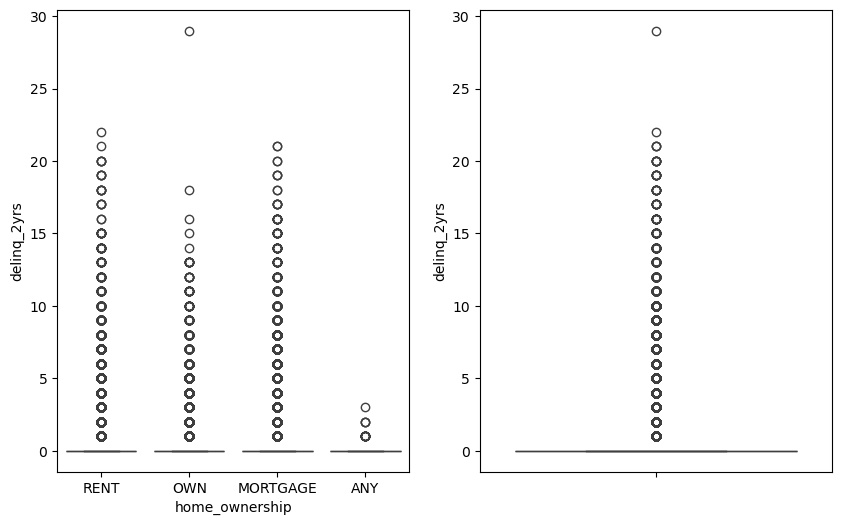

In [6]:
# descriptive statistics
fig, axes = plt.subplots(1, 2, figsize=(10,6))

sns.boxplot(data= original_df,
        x = 'home_ownership',
        y = 'delinq_2yrs',
        ax = axes[0])
sns.boxplot(data= original_df,
            y = 'delinq_2yrs',
           ax = axes[1])

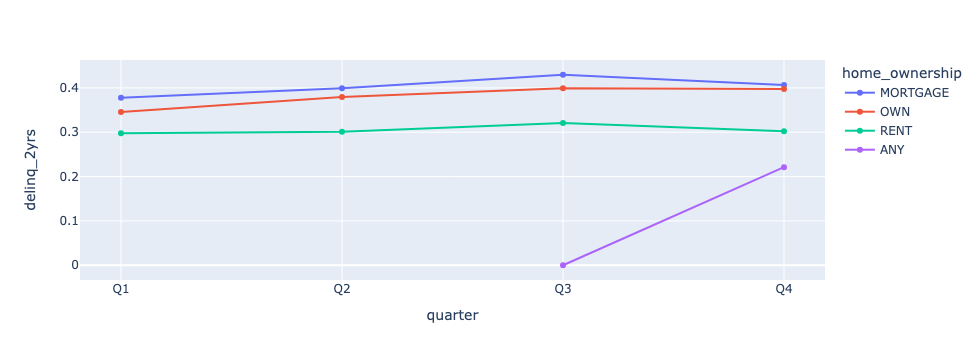

In [7]:
# is there any seasonality effect？
df_1 = original_df[["quarter","home_ownership","delinq_2yrs"]].groupby(["quarter","home_ownership"]).mean().reset_index()
fig = px.line(df_1, x =  'quarter', y = 'delinq_2yrs', color = 'home_ownership', markers = True)
fig.show()

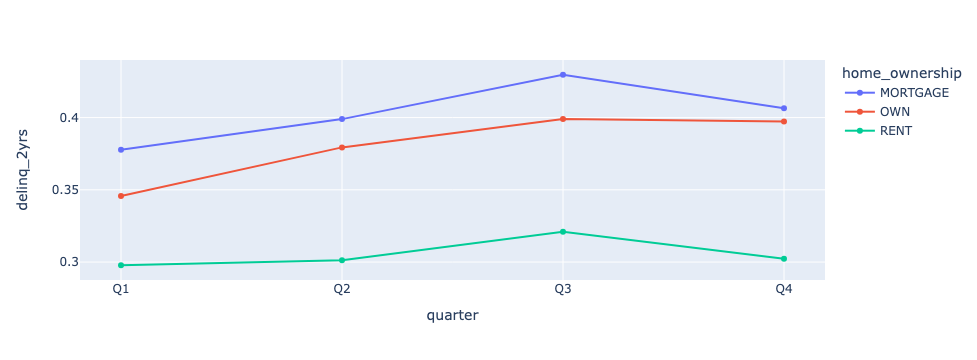

In [8]:
df_1 = df_1[df_1.get("home_ownership") != "ANY"]
fig = px.line(df_1, x =  'quarter', y = 'delinq_2yrs', color = 'home_ownership', markers = True)
fig.show()

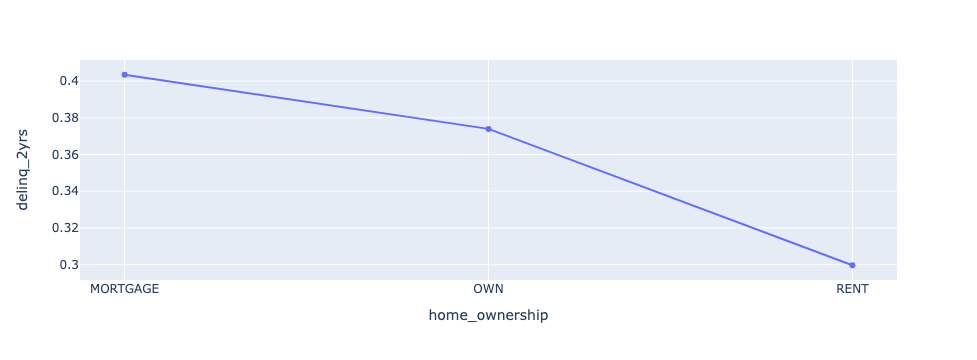

In [9]:
# run the randomized samplping process
def simulate_run(sample_size):
    new_df = original_df[original_df.get("home_ownership") != "ANY"].sample(sample_size, replace=True)[["home_ownership","delinq_2yrs"]].groupby(["home_ownership"]).mean().reset_index()
    fig = px.line(new_df, x =  'home_ownership', y = 'delinq_2yrs', color = None, markers = True)
    fig.show()
simulate_run(100000)

In [10]:
df_to_check = original_df[["quarter","home_ownership","delinq_2yrs"]]
df_to_check = df_to_check.groupby(["quarter","home_ownership"]).count().unstack().fillna(0)
df_to_check

delinq_2yrs                           
home_ownership         ANY MORTGAGE      OWN     RENT
quarter                                              
Q1                     0.0  66827.0  16190.0  50854.0
Q2                     0.0  47152.0  12339.0  38353.0
Q3                     6.0  46755.0  12324.0  40026.0
Q4                   104.0  50764.0  12178.0  40489.0

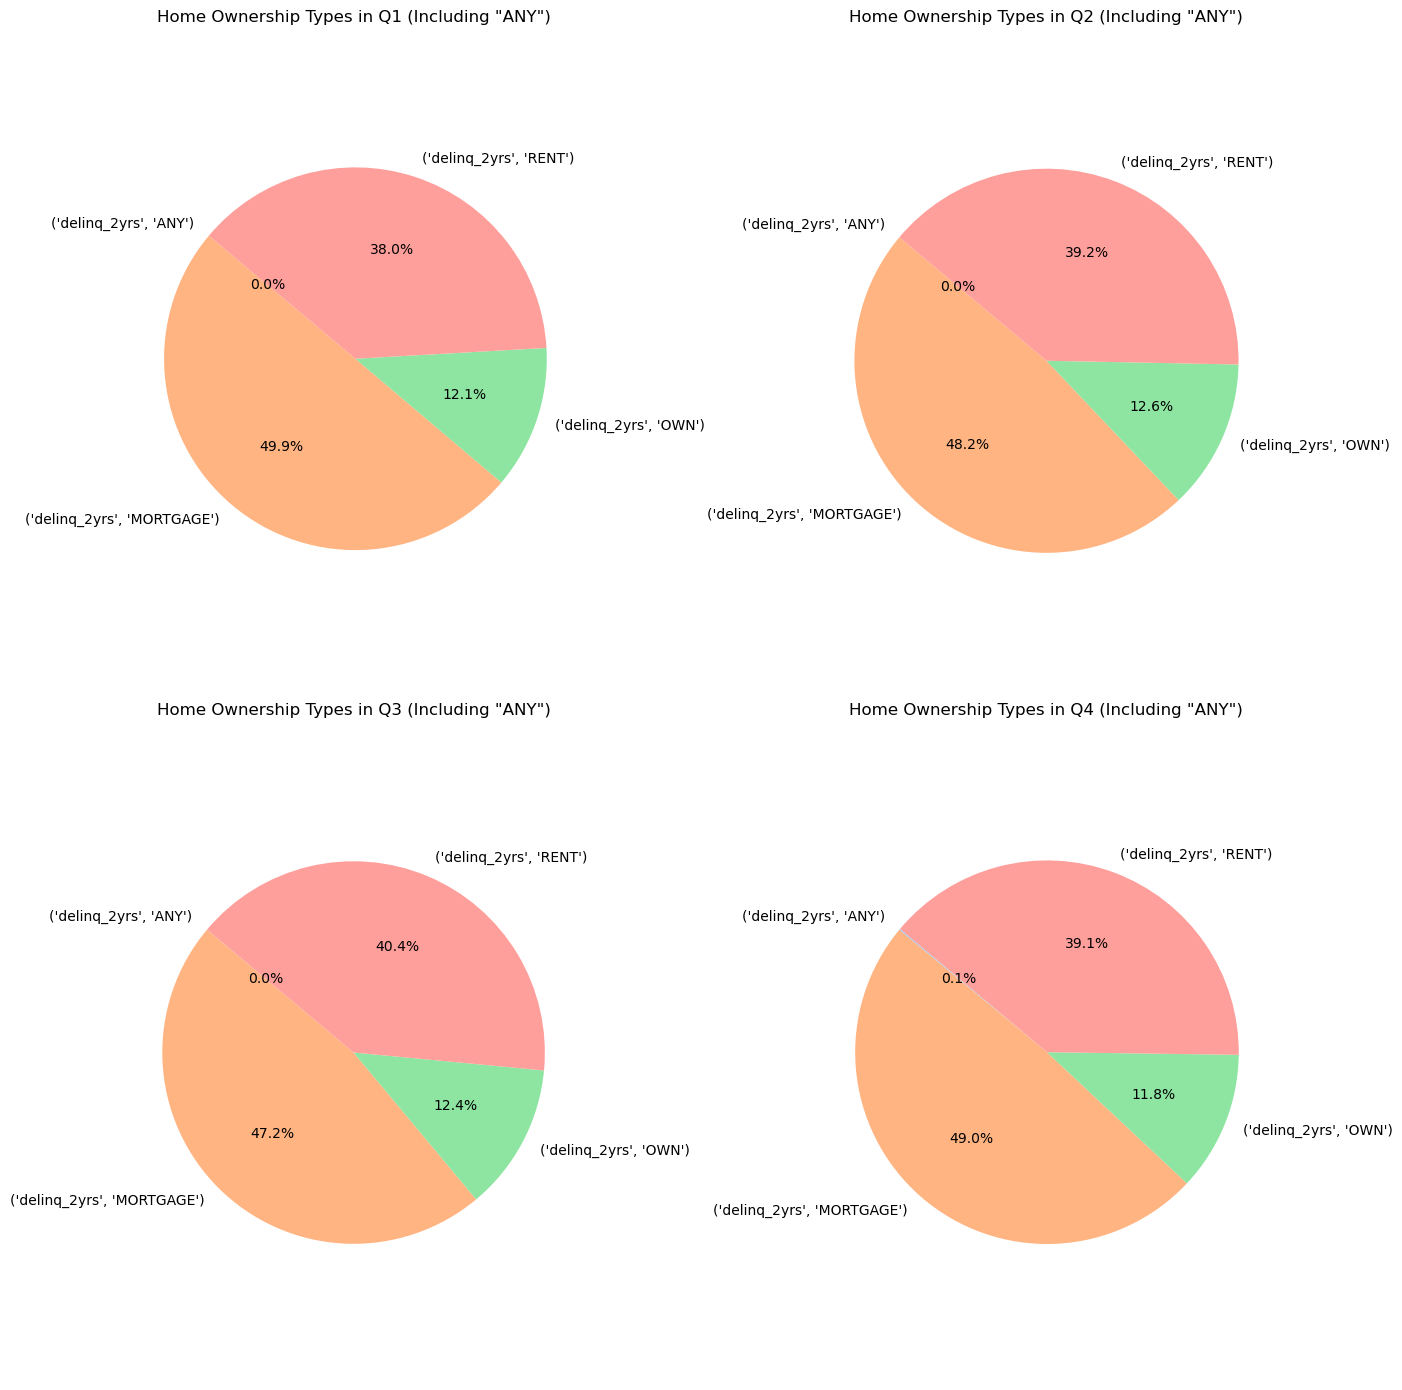

In [11]:
# Set the color palette using seaborn
colors = sns.color_palette('pastel')[0:len(df_to_check.columns)]
# Setup the figure and axes for a 2x2 grid of pie charts
fig, axs = plt.subplots(2, 2, figsize=(14, 14))
axs = axs.flatten()  # Flatten the 2x2 grid into a 1D array of axes
# Generating a pie chart for each quarter using seaborn's color palette
for i, quarter in enumerate(df_to_check.index):
    axs[i].pie(df_to_check.loc[quarter], labels=df_to_check.columns, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[i].set_title(f'Home Ownership Types in {quarter} (Including "ANY")')
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()

In [12]:
original_df

index        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0         1.0  73795709        NaN    15000.0      15000.0          15000.0   
1         2.0  74696824        NaN    33600.0      33600.0          33600.0   
2         3.0  74705262        NaN    14000.0      14000.0          14000.0   
3         4.0  75122431        NaN     9550.0       9550.0           9550.0   
4         5.0  75368911        NaN    13150.0      13150.0          13150.0   
...       ...       ...        ...        ...          ...              ...   
103530    NaN  89885898        NaN    24000.0      24000.0          24000.0   
103531    NaN  88977788        NaN    24000.0      24000.0          24000.0   
103532    NaN  88985880        NaN    40000.0      40000.0          40000.0   
103533    NaN  88224441        NaN    24000.0      24000.0          24000.0   
103534    NaN  88215728        NaN    14000.0      14000.0          14000.0   

              term int_rate  installment grade  ...  \
0        60 months   19.53%       393.50     D  ...   
1        36 months   10.75%      1096.05     B  ...   
2        36 months   11.47%       461.47     B  ...   
3        36 months   14.46%       328.54     C  ...   
4        36 months   17.27%       470.61     D  ...   
...            ...      ...          ...   ...  ...   
103530   60 months   12.79%       543.50     C  ...   
103531   60 months   10.49%       515.74     B  ...   
103532   60 months   10.49%       859.56     B  ...   
103533   60 months   14.49%       564.56     C  ...   
103534   60 months   14.49%       329.33     C  ...   

       hardship_payoff_balance_amount hardship_last_payment_amount  \
0                                 NaN                          NaN   
1                                 NaN                          NaN   
2                                 NaN                          NaN   
3                                 NaN                          NaN   
4                                 NaN                          NaN   
...                               ...                          ...   
103530                            NaN                          NaN   
103531                            NaN                          NaN   
103532                            NaN                          NaN   
103533                            NaN                          NaN   
103534                            NaN                          NaN   

       debt_settlement_flag debt_settlement_flag_date  settlement_status  \
0                         Y                    19-Jul             BROKEN   
1                         N                       NaN                NaN   
2                         N                       NaN                NaN   
3                         N                       NaN                NaN   
4                         N                       NaN                NaN   
...                     ...                       ...                ...   
103530                    N                       NaN                NaN   
103531                    N                       NaN                NaN   
103532                    N                       NaN                NaN   
103533                    Y                    Apr-19           COMPLETE   
103534                    N                       NaN                NaN   

       settlement_date settlement_amount settlement_percentage  \
0               18-Jan            6544.0                 50.01   
1                  NaN               NaN                   NaN   
2                  NaN               NaN                   NaN   
3                  NaN               NaN                   NaN   
4                  NaN               NaN                   NaN   
...                ...               ...                   ...   
103530             NaN               NaN                   NaN   
103531             NaN               NaN                   NaN   
103532             NaN               NaN          

In [13]:
# t-test
import scipy.stats as stats
df_1 = original_df
w1=df_1[df_1['home_ownership']=='MORTGAGE']['delinq_2yrs']
w2=df_1[(df_1['home_ownership']=='OWN') | (df_1['home_ownership']=='RENT')]['delinq_2yrs']
stats.ttest_ind(a=w1, b=w2,equal_var=False)

Ttest_indResult(statistic=27.184150546905297, pvalue=1.3761788175727912e-162)

In [14]:
df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0       96191765        NaN     9300.0       9300.0           9300.0   
1       96419283        NaN    14400.0      14400.0          14400.0   
2       96379251        NaN    10000.0      10000.0          10000.0   
3       96409250        NaN     8000.0       8000.0           8000.0   
4       96229241        NaN     5000.0       5000.0           5000.0   
...          ...        ...        ...          ...              ...   
103530  89885898        NaN    24000.0      24000.0          24000.0   
103531  88977788        NaN    24000.0      24000.0          24000.0   
103532  88985880        NaN    40000.0      40000.0          40000.0   
103533  88224441        NaN    24000.0      24000.0          24000.0   
103534  88215728        NaN    14000.0      14000.0          14000.0   

              term int_rate  installment grade sub_grade  ...  \
0        36 months    8.24%       292.46     B        B1  ...   
1        60 months    7.99%       291.92     A        A5  ...   
2        36 months   11.39%       329.24     B        B3  ...   
3        36 months    7.99%       250.66     A        A5  ...   
4        36 months   10.49%       162.49     B        B2  ...   
...            ...      ...          ...   ...       ...  ...   
103530   60 months   12.79%       543.50     C        C1  ...   
103531   60 months   10.49%       515.74     B        B3  ...   
103532   60 months   10.49%       859.56     B        B3  ...   
103533   60 months   14.49%       564.56     C        C4  ...   
103534   60 months   14.49%       329.33     C        C4  ...   

       hardship_payoff_balance_amount hardship_last_payment_amount  \
0                                 NaN                          NaN   
1                                 NaN                          NaN   
2                                 NaN                          NaN   
3                                 NaN                          NaN   
4                                 NaN                          NaN   
...                               ...                          ...   
103530                            NaN                          NaN   
103531                            NaN                          NaN   
103532                            NaN                          NaN   
103533                            NaN                          NaN   
103534                            NaN                          NaN   

       debt_settlement_flag  debt_settlement_flag_date settlement_status  \
0                         N                        NaN               NaN   
1                         N                        NaN               NaN   
2                         N                        NaN               NaN   
3                         N                        NaN               NaN   
4                         N                        NaN               NaN   
...                     ...                        ...               ...   
103530                    N                        NaN               NaN   
103531                    N                        NaN               NaN   
103532                    N                        NaN               NaN   
103533                    Y                     Apr-19          COMPLETE   
103534                    N                        NaN               NaN   

       settlement_date settlement_amount settlement_percentage  \
0                  NaN               NaN                   NaN   
1                  NaN               NaN                   NaN   
2                  NaN               NaN                   NaN   
3                  NaN               NaN                   NaN   
4                  NaN               NaN                   NaN   
...                ...               ...                   ...   
103530             NaN               NaN                   NaN   
103531             NaN               NaN                   NaN   
103532             N

In [15]:
# generate a new df for further analysis
for i,link in enumerate(lst_link):
    # create a dummy variable
    home_ownership_dummies = pd.get_dummies(dict_df[f"Q{i+1}"]['home_ownership'], prefix='home_ownership', drop_first=True) # avoid perfect multicolinearity
    # add these dummy variables back to the original dataframe
    dict_df[f"Q{i+1}"] = pd.concat([dict_df[f"Q{i+1}"], home_ownership_dummies], axis=1)
    # drop the original 'home_ownership' column
    dict_df[f"Q{i+1}"].drop(columns=['home_ownership'],inplace=True)
    # add a new column quarter
    dict_df[f"Q{i+1}"]["quarter"] = f"Q{i+1}"

# save the revised dataset as df
df1, df2, df3, df4 = dict_df["Q1"], dict_df["Q2"], dict_df["Q3"], dict_df["Q4"]
df = pd.concat([df1, df2,df3,df4])

df["home_ownership_OWN"] = [1 if x else 0 for x in df["home_ownership_OWN"]]
df["home_ownership_RENT"] = [1 if x else 0 for x in df["home_ownership_RENT"]]
df.head()


# df_with_15_vars
# keep only the columns of interest
df_with_15_vars = df[['delinq_2yrs','loan_amnt','total_rec_late_fee','funded_amnt','annual_inc'
                 ,'total_acc','total_bc_limit','int_rate','avg_cur_bal','revol_bal'
                 ,'dti','pct_tl_nvr_dlq','fico_range_high', 'home_ownership_OWN', 'home_ownership_RENT']]

<AxesSubplot:>

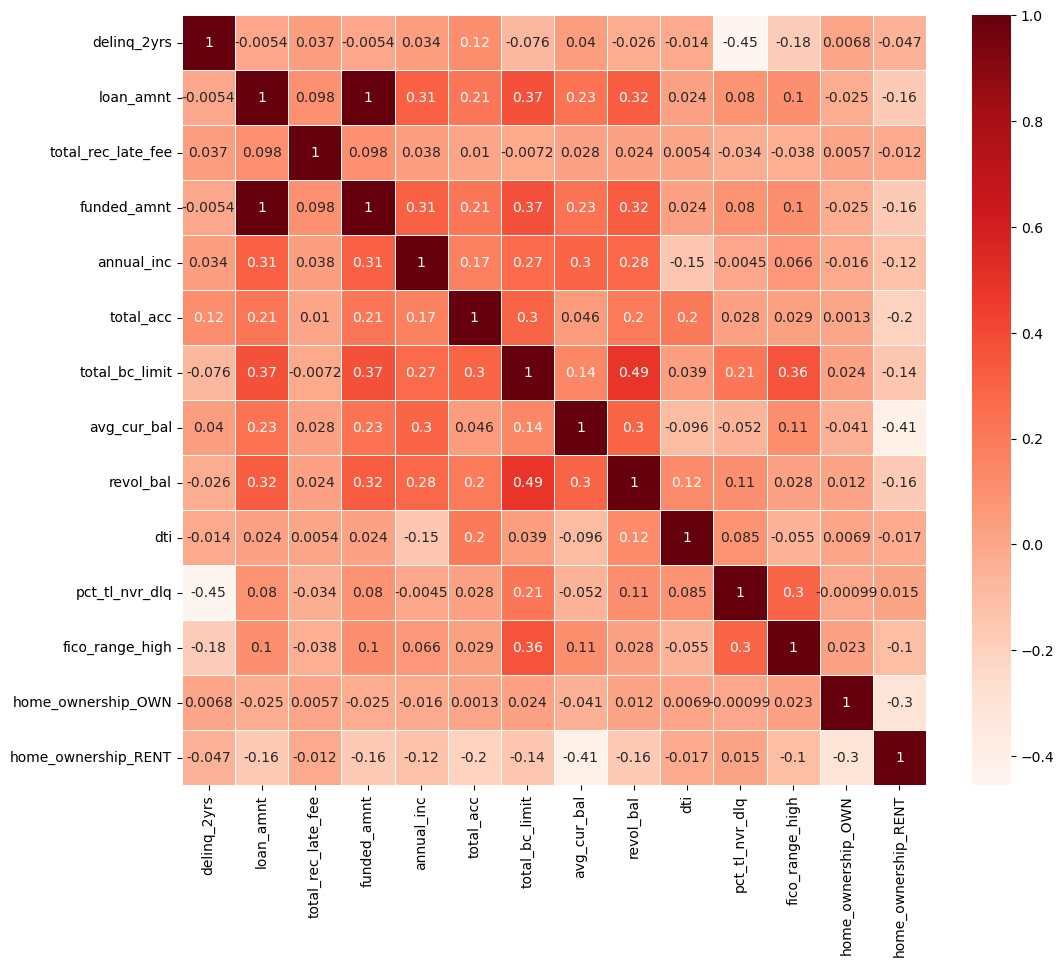

In [16]:
# heatmap for Q1
plt.figure(figsize=(12,10))
corr_metric = df_with_15_vars.corr(numeric_only = True)
sns.heatmap(corr_metric, annot = True,cmap='Reds', linewidths=.5)

In [17]:
# from the previous graph, we choose
# y: delinq_2yrs
# x: home_ownership_OWN and home_ownership_RENT
# confounding variables (against home_ownership_RENT): avg_cur_bal, total_acc, loan_amnt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_42060\351690485.py:7: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



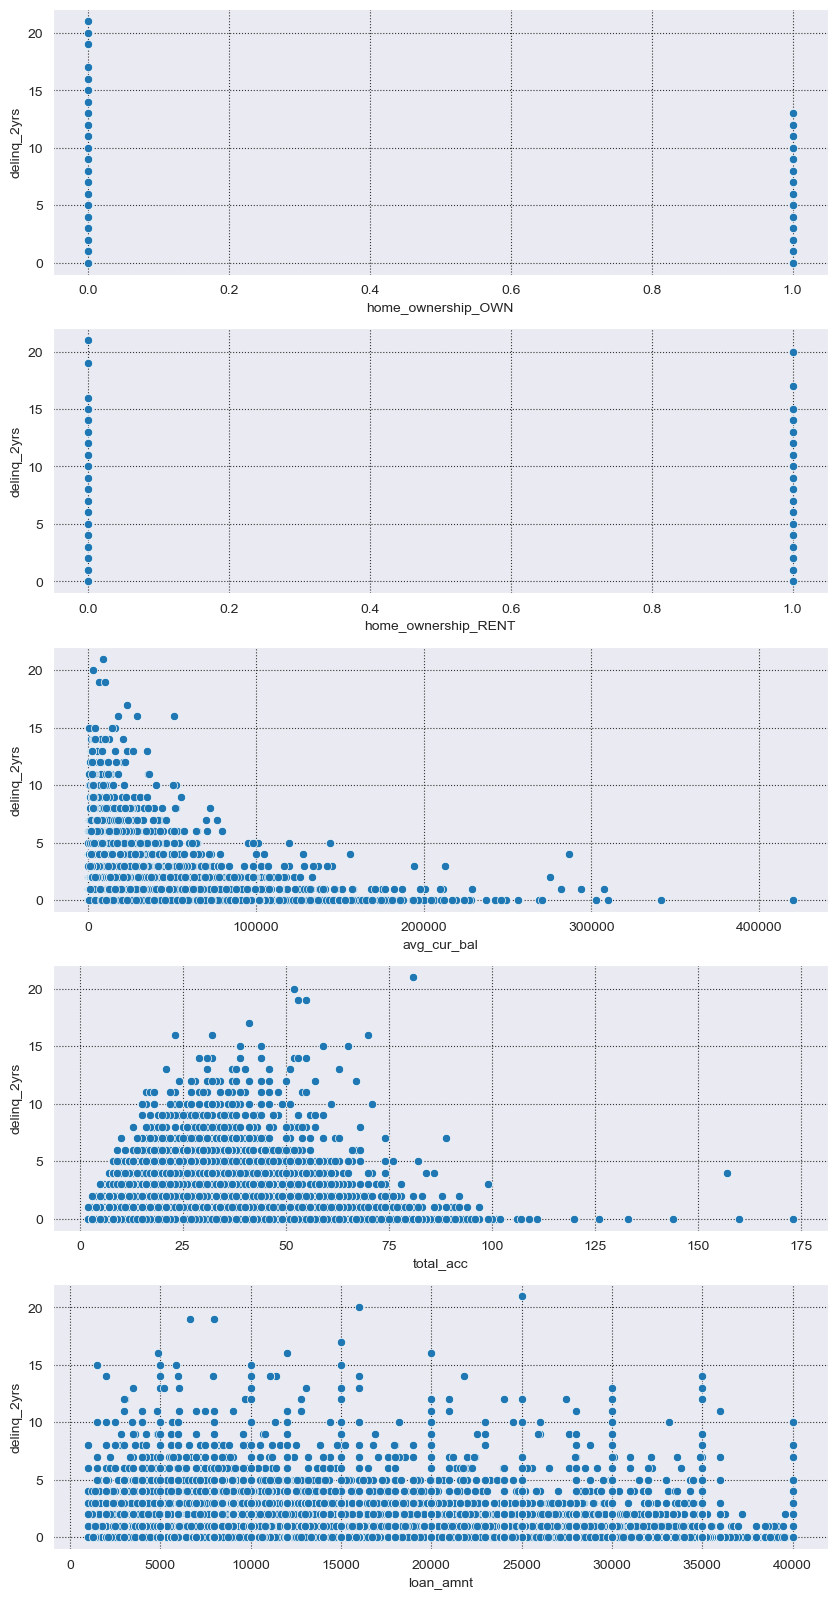

In [18]:
# descriptive analysis
sns.set_style("darkgrid", {"grid.color": ".2", "grid.linestyle": ":"})
x_lst = ["home_ownership_OWN", "home_ownership_RENT", "avg_cur_bal", "total_acc", "loan_amnt"]
fig, axes = plt.subplots(5,1,figsize=(10,20))
for i in range(len(x_lst)):
    sns.scatterplot(x = df2[x_lst[i]], y = df2['delinq_2yrs'], ax=axes[i])
fig.show()

In [19]:
original_df = original_df.dropna(axis =1)
original_df

id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0       73795709    15000.0      15000.0          15000.0   60 months   
1       74696824    33600.0      33600.0          33600.0   36 months   
2       74705262    14000.0      14000.0          14000.0   36 months   
3       75122431     9550.0       9550.0           9550.0   36 months   
4       75368911    13150.0      13150.0          13150.0   36 months   
...          ...        ...          ...              ...         ...   
103530  89885898    24000.0      24000.0          24000.0   60 months   
103531  88977788    24000.0      24000.0          24000.0   60 months   
103532  88985880    40000.0      40000.0          40000.0   60 months   
103533  88224441    24000.0      24000.0          24000.0   60 months   
103534  88215728    14000.0      14000.0          14000.0   60 months   

       int_rate  installment grade sub_grade home_ownership  ...  \
0        19.53%       393.50     D        D5           RENT  ...   
1        10.75%      1096.05     B        B4           RENT  ...   
2        11.47%       461.47     B        B5           RENT  ...   
3        14.46%       328.54     C        C4            OWN  ...   
4        17.27%       470.61     D        D2           RENT  ...   
...         ...          ...   ...       ...            ...  ...   
103530   12.79%       543.50     C        C1       MORTGAGE  ...   
103531   10.49%       515.74     B        B3       MORTGAGE  ...   
103532   10.49%       859.56     B        B3       MORTGAGE  ...   
103533   14.49%       564.56     C        C4           RENT  ...   
103534   14.49%       329.33     C        C4       MORTGAGE  ...   

        pct_tl_nvr_dlq pub_rec_bankruptcies tax_liens tot_hi_cred_lim  \
0                100.0                  0.0       0.0         56282.0   
1                100.0                  0.0       0.0        281000.0   
2                 76.0                  0.0       1.0         66827.0   
3                100.0                  0.0       0.0         49000.0   
4                 74.0                  0.0       0.0         41450.0   
...                ...                  ...       ...             ...   
103530           100.0                  0.0       0.0        102517.0   
103531            75.9                  0.0       1.0        227883.0   
103532            75.7                  0.0       0.0         55970.0   
103533            96.2                  1.0       0.0         84664.0   
103534            81.8                  0.0       0.0        163804.0   

       total_bal_ex_mort total_bc_limit total_il_high_credit_limit  \
0                40244.0        10600.0                    45682.0   
1                36256.0        77400.0                        0.0   
2                36126.0         9800.0                    49427.0   
3                10728.0        49000.0                        0.0   
4                32733.0        10750.0                    27000.0   
...                  ...            ...                        ...   
103530          104422.0            0.0                    52017.0   
103531          140118.0        27900.0                   172283.0   
103532           28398.0        12300.0                    42670.0   
103533           62426.0        20700.0                    58764.0   
103534           44215.0         9500.0                    34169.0   

       hardship_flag debt_settlement_flag  quarter  
0                  N                    Y       Q1  
1                  N                    N       Q1  
2                  N                    N       Q1  
3                  N                    N       Q1  
4                  N                    N       Q1  
...              ...                  ...      ...  
103530             N                    N       Q4  
103531             N                    N       Q4  
103532             N                    N       Q4  
103533             N                    Y       Q4  
103534             

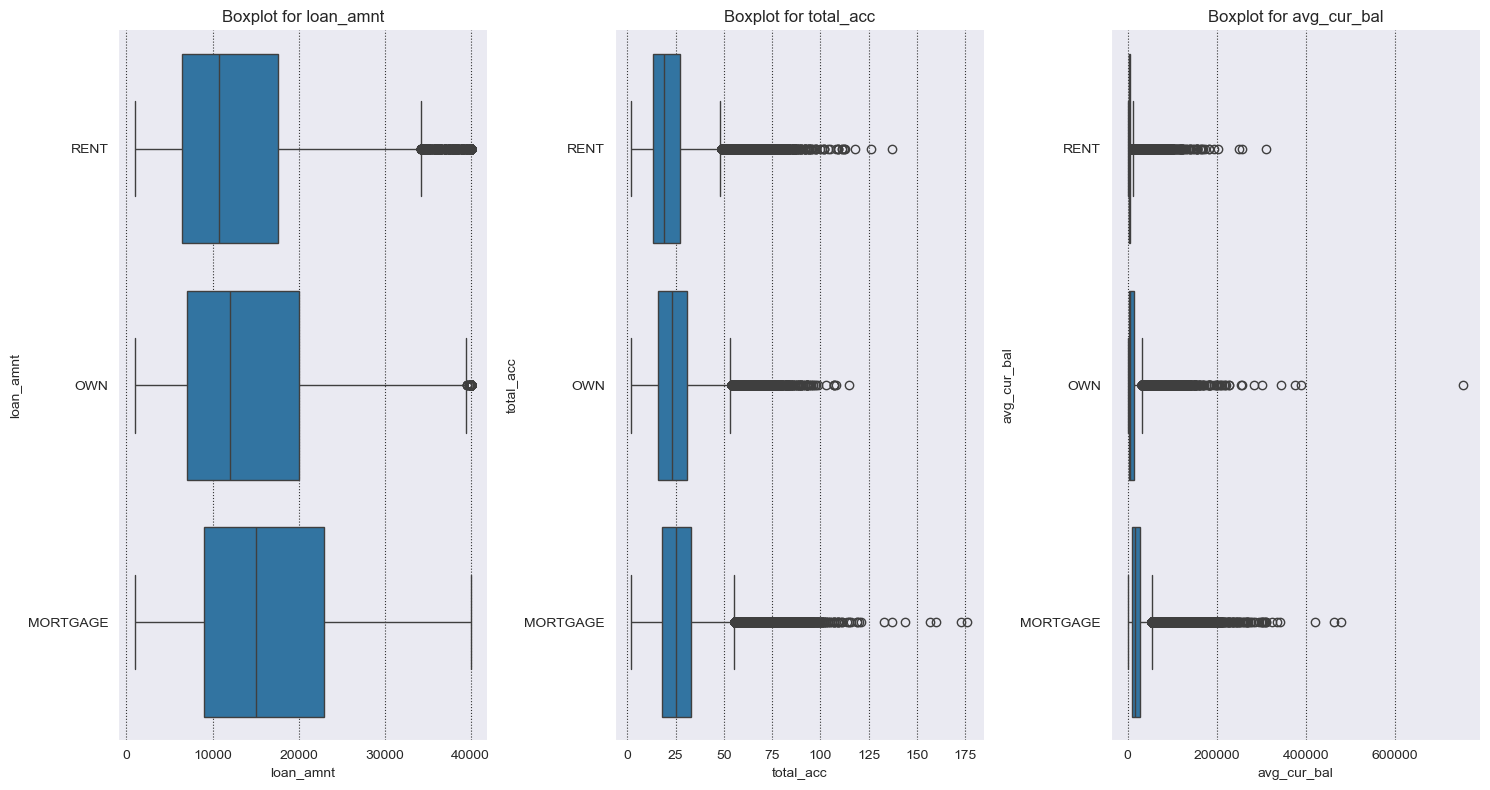

In [20]:
original_df = original_df[original_df['home_ownership'] != 'ANY']
homeownership_column = "home_ownership"

columns_to_compare = ['loan_amnt', 'total_acc', 'avg_cur_bal']  

plt.figure(figsize=(15, 8))

# Iterate through columns and create boxplots
for column in columns_to_compare:
    plt.subplot(1, len(columns_to_compare), columns_to_compare.index(column) + 1)
    sns.boxplot(x=column, y=homeownership_column, data=original_df)
    plt.title(f'Boxplot for {column}')
    plt.ylabel(column)

# Adjust layout
plt.tight_layout()
sns.despine()
# Show the plot
plt.show()

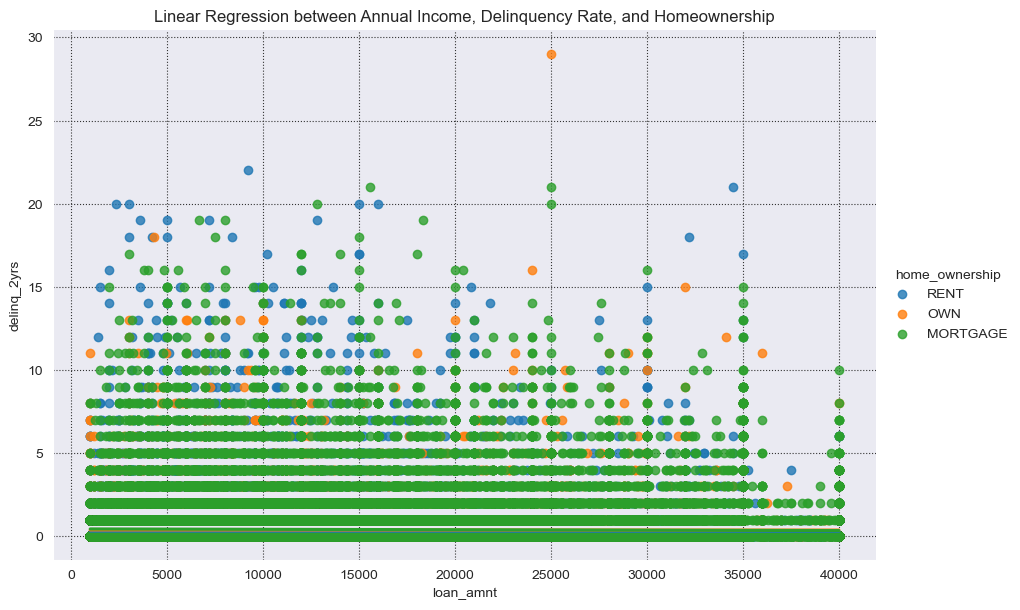

In [21]:
sns.lmplot(x='loan_amnt', y='delinq_2yrs', hue='home_ownership', data=original_df, height=6, aspect=1.5)
plt.title('Linear Regression between Annual Income, Delinquency Rate, and Homeownership')
plt.show()

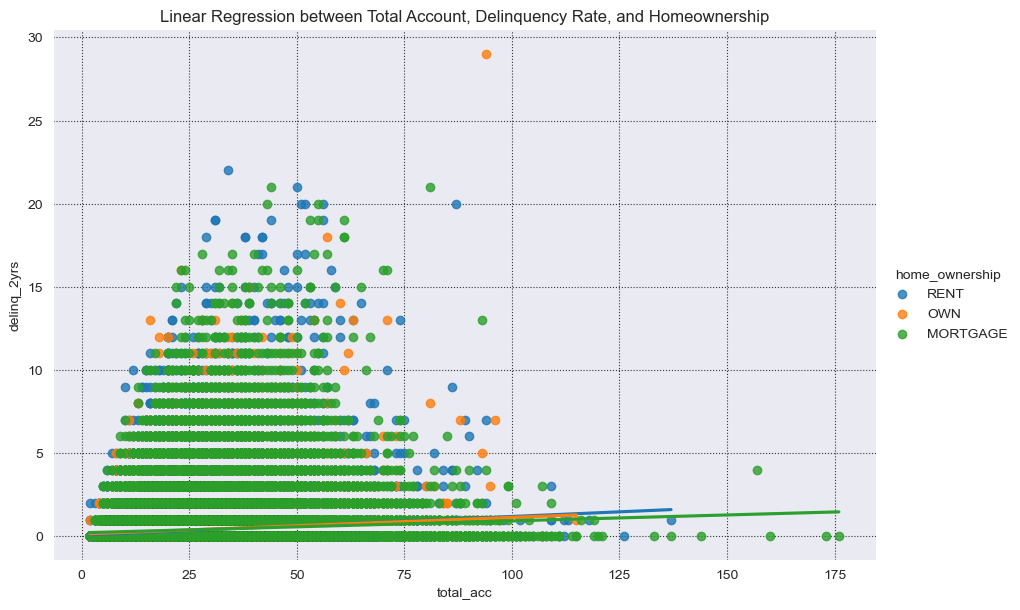

In [22]:
sns.lmplot(x='total_acc', y='delinq_2yrs', hue='home_ownership', data=original_df, height=6, aspect=1.5)
plt.title('Linear Regression between Total Account, Delinquency Rate, and Homeownership')
plt.show()

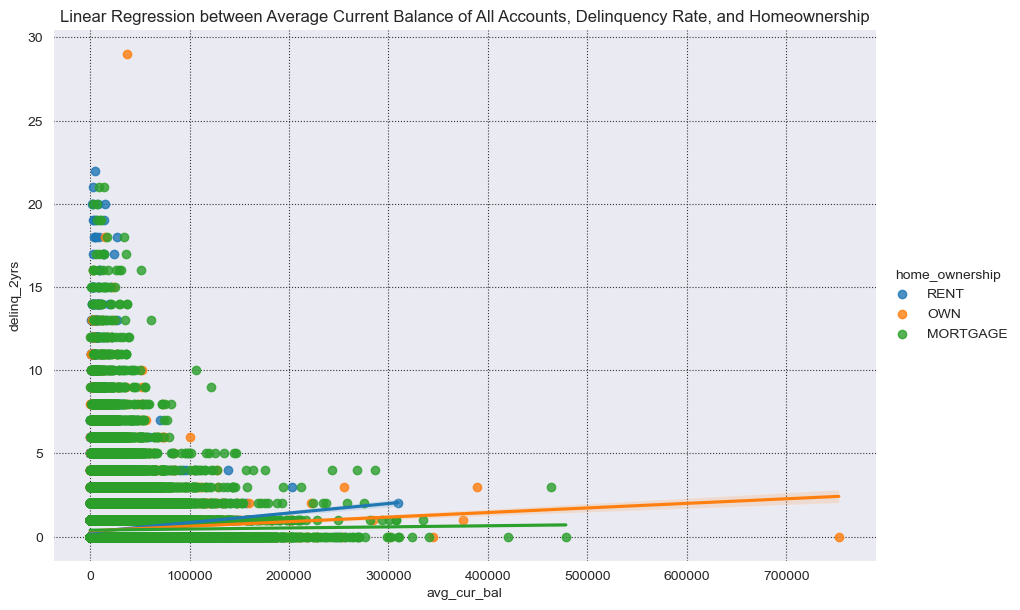

In [23]:
sns.lmplot(x='avg_cur_bal', y='delinq_2yrs', hue='home_ownership', data=original_df, height=6, aspect=1.5)
plt.title('Linear Regression between Average Current Balance of All Accounts, Delinquency Rate, and Homeownership')
plt.show()

In [24]:
# (David)： final step: compare the result of simple linear regression model (regress one y on one x)
# with our model with confounding variables (and interaction terms maybe?)

# to save time for processing, we only select 10000 rows from the original dataset
df2 = df_with_15_vars.dropna().sample(100000)

df2

delinq_2yrs  loan_amnt  total_rec_late_fee  funded_amnt  annual_inc  \
56108          2.0     7000.0                0.00       7000.0     55000.0   
65461          0.0     4000.0                0.00       4000.0     60000.0   
36722          0.0    10000.0                0.00      10000.0     55000.0   
24861          1.0     1800.0                0.00       1800.0     72000.0   
39955          0.0     9000.0                0.00       9000.0     66000.0   
...            ...        ...                 ...          ...         ...   
14744          0.0    10400.0                0.00      10400.0     55000.0   
86770          0.0    13350.0                0.00      13350.0     45000.0   
76544          0.0    13000.0                0.00      13000.0     40000.0   
31479          0.0    19250.0                0.00      19250.0     55000.0   
26101          0.0    20000.0               22.62      20000.0     85000.0   

       total_acc  total_bc_limit int_rate  avg_cur_bal  revol_bal    dti  \
56108       47.0         17650.0    7.99%      15619.0     8798.0  24.94   
65461       10.0         13500.0   16.99%       3302.0    14729.0  15.34   
36722       25.0          6300.0   11.47%       3569.0     7758.0  21.62   
24861       20.0          4800.0   13.49%      22744.0     6353.0  12.47   
39955       20.0         10000.0    5.32%      34019.0    31470.0   6.73   
...          ...             ...      ...          ...        ...    ...   
14744       20.0         20500.0   11.49%       3224.0     7869.0  31.05   
86770       26.0         10600.0   11.99%       1668.0     6473.0  22.83   
76544       45.0         18700.0    9.16%       1316.0    10503.0  18.21   
31479       18.0         23400.0   14.99%       6713.0    26553.0  31.21   
26101       11.0         49600.0   12.74%      85412.0   130589.0  19.13   

       pct_tl_nvr_dlq  fico_range_high  home_ownership_OWN  \
56108            96.0            689.0                   0   
65461            80.0            669.0                   0   
36722            92.0            669.0                   0   
24861            94.7            724.0                   0   
39955           100.0            734.0                   0   
...               ...              ...                 ...   
14744           100.0            734.0                   0   
86770            84.6            704.0                   0   
76544            96.0            679.0                   0   
31479           100.0            674.0                   0   
26101           100.0            679.0                   0   

       home_ownership_RENT  
56108                    0  
65461                    0  
36722                    1  
24861                    0  
39955                    0  
...                    ...  
14744                    1  
86770                    0  
76544                    1  
31479                    1  
26101                    0  

[100000 rows x 15 columns]

In [25]:
# find the slope andn p value for interaction

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


def calculate_mspe(df, outcome, features, interactions):
    # df: a dataframe
    # outcome: a string indicating the name of the outcome vari
    # features: a list of strings composed of names of independent variables (including confounding variables)
    # interactions: a list of 2 str composed of pairs of interaction terms
    if interactions != []:
        interaction_term_name = f"interaction_{interactions[0]}_{interactions[1]}"
        df[interaction_term_name] = df[interactions[0]] * df[interactions[1]]
        X = df[features + [f"interaction_{interactions[0]}_{interactions[1]}"]]
        y = df[outcome]
    else:
        X = df[features]
        y = df[outcome]

    # Split the data into training and test sets (9/10 are training data, 1/10 is test data)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=555)

    # Add a constant to the model (for the intercept)
    X_with_constant = sm.add_constant(X_train)
    X_test_with_constant = sm.add_constant(X_test)

    # Fit the model using statsmodels
    model = sm.OLS(y_train, X_with_constant)
    fitted_model = model.fit()

    # Get the coefficient (slope) and p-value for the interaction term
    if interactions != []:
        slope = fitted_model.params[interaction_term_name]
        p_value = fitted_model.pvalues[interaction_term_name]
    else:
        print("No interaction term inputted.")

    # Calculate Mean Squared Prediction Error (MSPE)
    y_pred = fitted_model.predict(X_test_with_constant)
    mspe = mean_squared_error(y_test, y_pred)
    print(f"The MSPE of this model is {mspe}.")

    return fitted_model.summary()

In [26]:
# mod1: OLS with two variables
features = ['home_ownership_RENT',"home_ownership_OWN"]
outcome = 'delinq_2yrs'
interactions = []

calculate_mspe(df2, outcome, features, interactions)

No interaction term inputted.
The MSPE of this model is 0.8638083015899504.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            delinq_2yrs   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     85.38
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           9.04e-38
Time:                        15:00:37   Log-Likelihood:            -1.2292e+05
No. Observations:               90000   AIC:                         2.458e+05
Df Residuals:                   89997   BIC:                         2.459e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3945      0.005     87.174      0.000       0.386       0.403
home_ownership_RENT    -0.0850      0.007    -12.522      0.000      -0.098      -0.072
home_ownership_OWN     -0.0016      0.010     -0.159      0.874      -0.021       0.018
==============================================================================
Omnibus:                    95150.530   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9615171.231
Skew:                           5.241   Prob(JB):                         0.00
Kurtosis:                      52.540   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# mod2: better version
features = ['home_ownership_RENT', 'home_ownership_OWN', 'avg_cur_bal', 'total_acc', 'loan_amnt']
outcome = 'delinq_2yrs'
interactions = ['home_ownership_RENT', 'avg_cur_bal']

calculate_mspe(df2, outcome, features, interactions)

The MSPE of this model is 0.8529380673685885.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            delinq_2yrs   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          6.80e-310
Time:                        15:00:37   Log-Likelihood:            -1.2228e+05
No. Observations:               90000   AIC:                         2.446e+05
Df Residuals:                   89993   BIC:                         2.446e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.1617      0.011     15.138      0.000       0.141       0.183
home_ownership_RENT                            -0.0219      0.009     -2.341      0.019      -0.040      -0.004
home_ownership_OWN                              0.0328      0.010      3.183      0.001       0.013       0.053
avg_cur_bal                                  2.545e-06   2.35e-07     10.833      0.000    2.08e-06    3.01e-06
total_acc                                       0.0093      0.000     34.062      0.000       0.009       0.010
loan_amnt                                    -4.25e-06   3.68e-07    -11.557      0.000   -4.97e-06   -3.53e-06
interaction_home_ownership_RENT_avg_cur_bal  2.268e-06   7.82e-07      2.898      0.004    7.34e-07     3.8e-06
==============================================================================
Omnibus:                    94105.479   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9140853.888
Skew:                           5.155   Prob(JB):                         0.00
Kurtosis:                      51.283   Cond. No.                     1.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# the difference seems small? no really because the deliquency rate for all types of homeownership has a [25%,75%] = [0,0]